In [450]:
import pandas as pd
import numpy as np
import plotly.express as px
from scipy import stats
import matplotlib.pyplot as plt

In [451]:
data = pd.read_csv('d:/data/new_data/Dataset/Dataset/data1/Travel.csv')

In [452]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [453]:
def missing_values(data):
    size = data.size
    missing_count = data.isna().sum()
    missing_count = missing_count[missing_count>0]
    missing_total = missing_count.sum()
    print('The size of the data is {}.'.format(size))
    print('The data contains {}% missing values.'.format(round(missing_total*100/size,2)))
    print('Columns with missing values are:')
    print(missing_count.sort_values(ascending = False))

    missing_count.sort_values().plot.barh(color = 'teal')
    plt.title('Missing values by columns', size=15,loc='left')
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.xlabel('Column names', fontsize=13)
    plt.ylabel('No. of missing values', fontsize=13)
    plt.show()

The size of the data is 97760.
The data contains 1.04% missing values.
Columns with missing values are:
DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
dtype: int64


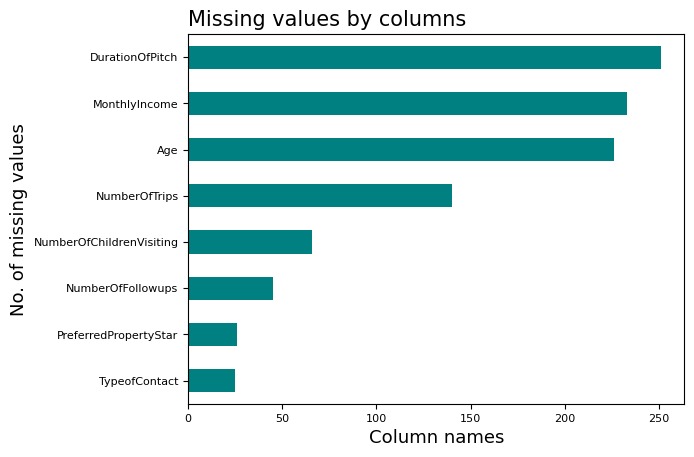

In [454]:
missing_values(data)

## Methods to drop or replace missing values:

### Drop missing values:
##### 1. Drop rows or columns that only have missing values
If the data has rows or columns with all null values, we can drop them as they are not useful in anyway.

In [455]:
data.dropna(how='all',inplace=True)

##### 2. Drop rows or columns based on a threshold value:
A threshold value can be set for null values in a row, if the null values are greater than the threshold, the rows will be dropped. 

In [456]:
data.dropna(thresh = 5,inplace=True)

### Replace or impute null values:
##### 1. Replace null values with another value:

In [457]:
data.TypeofContact.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4888 entries, 0 to 4887
Series name: TypeofContact
Non-Null Count  Dtype 
--------------  ----- 
4863 non-null   object
dtypes: object(1)
memory usage: 38.3+ KB


In [458]:
data.TypeofContact.fillna('No contact',inplace=True)

In [459]:
data.TypeofContact.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4888 entries, 0 to 4887
Series name: TypeofContact
Non-Null Count  Dtype 
--------------  ----- 
4888 non-null   object
dtypes: object(1)
memory usage: 38.3+ KB


##### 2. Impute null value with mean, median or mode using simpleimputer():

In [460]:
data.Age.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4888 entries, 0 to 4887
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
4662 non-null   float64
dtypes: float64(1)
memory usage: 38.3 KB


In [461]:
df1 = data[['Age']].copy()
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean') # The strategy can be replaced with mode or median.
impute_data = imputer.fit_transform(df1)
data['Age'] = impute_data

In [462]:
data.Age.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4888 entries, 0 to 4887
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
4888 non-null   float64
dtypes: float64(1)
memory usage: 38.3 KB


##### 3. Impute null values with K Nearest Neighbour:

In [463]:
data.NumberOfFollowups.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4888 entries, 0 to 4887
Series name: NumberOfFollowups
Non-Null Count  Dtype  
--------------  -----  
4843 non-null   float64
dtypes: float64(1)
memory usage: 38.3 KB


In [464]:
df2 = data[['NumberOfFollowups']].copy()
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
impute_data = imputer.fit_transform(df2)
data['NumberOfFollowups'] = impute_data

In [465]:
data.NumberOfFollowups.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4888 entries, 0 to 4887
Series name: NumberOfFollowups
Non-Null Count  Dtype  
--------------  -----  
4888 non-null   float64
dtypes: float64(1)
memory usage: 38.3 KB


##### 4. Fill null value with ffill/bfill method
Null values can be filled in two ways, f-fill (forward fill) and b-fill (back fill).

In [466]:
data.NumberOfChildrenVisiting.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4888 entries, 0 to 4887
Series name: NumberOfChildrenVisiting
Non-Null Count  Dtype  
--------------  -----  
4822 non-null   float64
dtypes: float64(1)
memory usage: 38.3 KB


In [467]:
data['NumberOfChildrenVisiting'] = data['NumberOfChildrenVisiting'].fillna(method='ffill') # or bfill

In [468]:
data.NumberOfChildrenVisiting.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4888 entries, 0 to 4887
Series name: NumberOfChildrenVisiting
Non-Null Count  Dtype  
--------------  -----  
4888 non-null   float64
dtypes: float64(1)
memory usage: 38.3 KB
